<a href="https://colab.research.google.com/github/Rufaidah44/Arabic_Alphabet_Rawashin/blob/main/Rawashin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Formatting time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [2]:
#import Required Libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense 
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
import os 
import time
import matplotlib.pyplot as plt
from matplotlib import pyplot
from keras.preprocessing.image import load_img, img_to_array
import cv2

In [3]:
#Check GPU
import tensorflow as tf
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.6.0
Found GPU at: /device:GPU:0


In [4]:
from google.colab import files
uploaded= files.upload()

Saving Ubdated_Augmented_images.zip to Ubdated_Augmented_images.zip


In [5]:
!unzip /content/Updated_Augmented_images.zip

Archive:  /content/Updated_Augmented_images.zip
  inflating: Augmented_images/_15016901089.jpg  
  inflating: Augmented_images/_15016908678.jpg  
  inflating: Augmented_images/003.jpg  
  inflating: Augmented_images/01102014-1571-050258.jpg  
  inflating: Augmented_images/03062021-2059-140916.jpeg  
  inflating: Augmented_images/1000_87152f650c.jpg  
  inflating: Augmented_images/1000_dd2dd272cd.jpg  
  inflating: Augmented_images/101e3ac1-72db-4009-ac3d-6788f32efc44.jpg  
  inflating: Augmented_images/1066561-1745600589.jpg  
  inflating: Augmented_images/1067815.jpg  
  inflating: Augmented_images/1067817.jpg  
  inflating: Augmented_images/1067818.jpg  
  inflating: Augmented_images/1094973.jpg  
  inflating: Augmented_images/1-102.gif  
  inflating: Augmented_images/1153991-73691527.jpg  
  inflating: Augmented_images/1154411-331628878.jpg  
  inflating: Augmented_images/1178973.jpg  
  inflating: Augmented_images/120011_1352450254_7464.jpg  
  inflating: Augmented_images/120014_13

In [ ]:
#Unzip Dataset
!unzip /content/2_Rawashin_DS_.zip

Archive:  /content/2_Rawashin_DS_.zip
  inflating: Rwashin_Dataset/_15016901089.jpg  
  inflating: Rwashin_Dataset/_15016908678.jpg  
  inflating: Rwashin_Dataset/003.jpg  
  inflating: Rwashin_Dataset/01102014-1571-050258.jpg  
  inflating: Rwashin_Dataset/03062021-2059-140916.jpeg  
  inflating: Rwashin_Dataset/1000_87152f650c.jpg  
  inflating: Rwashin_Dataset/1000_dd2dd272cd.jpg  
  inflating: Rwashin_Dataset/101e3ac1-72db-4009-ac3d-6788f32efc44.jpg  
  inflating: Rwashin_Dataset/1066561-1745600589.jpg  
  inflating: Rwashin_Dataset/1067815.jpg  
  inflating: Rwashin_Dataset/1067817.jpg  
  inflating: Rwashin_Dataset/1067818.jpg  
  inflating: Rwashin_Dataset/1094973.jpg  
  inflating: Rwashin_Dataset/1-102.gif  
  inflating: Rwashin_Dataset/1153991-73691527.jpg  
  inflating: Rwashin_Dataset/1154411-331628878.jpg  
  inflating: Rwashin_Dataset/1178973.jpg  
  inflating: Rwashin_Dataset/120011_1352450254_7464.jpg  
  inflating: Rwashin_Dataset/120014_1352450290_972.jpg  
  inflatin

In [ ]:

data_gen = tf.keras.preprocessing.image.ImageDataGenerator(    
    #rotation_range=60,
    brightness_range=[0.2,1.0],
    #zoom_range=[0.5,1.0],
    #horizontal_flip=True,
)

In [ ]:
data_images = data_gen.flow_from_directory(
    '.', classes=['Rwashin_DS'],
    target_size=(256, 256),
    color_mode='rgb',
    class_mode = None,
    batch_size = BATCH_SIZE,
    shuffle=True,
    seed=42,
)

Found 500 images belonging to 1 classes.


In [ ]:
for f in os.listdir("/content/Rwashin_DS"):
    img = load_img('/content/Rwashin_DS'+ '/' +f)  
    x = img_to_array(img) 
    # Reshape the input image 
    x = x.reshape((1, ) + x.shape)  
    i = 0

    # generate 3 new augmented images 
    for batch in data_gen.flow_from_directory(
                '.', classes=['Rwashin_DS'],
                target_size=(256, 256),
                color_mode='rgb',
                class_mode = None,
                batch_size = 1000,
                shuffle=True,
                seed=42,
                save_to_dir ='Augmented_images',            
                save_prefix ='Aug2', save_format ='png'):
      i += 1
      if i > 0: 
          break
    
    

Found 500 images belonging to 1 classes.
Found 500 images belonging to 1 classes.


KeyboardInterrupt: ignored

In [ ]:
import shutil

shutil.rmtree('/content/Augmented_images')

In [ ]:
list = os.listdir('/content/Augmented_images') # dir is your directory path
number_files = len(list)
print (number_files)

2001


In [ ]:
list = os.listdir('/content/Rwashin_DS') # dir is your directory path
number_files = len(list)
print (number_files)

501


In [ ]:
import shutil
for img in list:
  shutil.copy('/content/Rwashin_DS/'+img, "/content/Augmented_images")

In [ ]:
!rm /content/Augmented_images/Aug2_217_8676924.png

In [ ]:
!zip -r /content/Aug-Rawashin2.zip /content/Augmented_images

  adding: content/Augmented_images/ (stored 0%)
  adding: content/Augmented_images/Aug1_393_8373296.png (deflated 0%)
  adding: content/Augmented_images/Aug2_240_533634.png (deflated 0%)
  adding: content/Augmented_images/2f831e32-051a-4659-8a4d-e7722880c88f.jpg (deflated 0%)
  adding: content/Augmented_images/Aug0_40_9854352.png (deflated 0%)
  adding: content/Augmented_images/Aug2_377_4113640.png (deflated 0%)
  adding: content/Augmented_images/Aug2_114_486799.png (deflated 0%)
  adding: content/Augmented_images/Aug2_428_3028631.png (deflated 0%)
  adding: content/Augmented_images/Aug0_451_1935090.png (deflated 0%)
  adding: content/Augmented_images/Aug2_131_689556.png (deflated 0%)
  adding: content/Augmented_images/Aug0_341_8805586.png (deflated 0%)
  adding: content/Augmented_images/Slide12.JPG (deflated 10%)
  adding: content/Augmented_images/Aug2_180_7303693.png (deflated 0%)
  adding: content/Augmented_images/Aug1_18_9714891.png (deflated 0%)
  adding: content/Augmented_images/

In [42]:
# Generation resolution - Must be square 
# Training data is also scaled to this.
# Note GENERATE_RES 4 or higher  
# will blow Google CoLab's memory and have not
# been tested extensivly.
GENERATE_RES = 5 # Generation resolution factor 
# (1=32, 2=64, 3=96, 4=128, etc.)
GENERATE_SQUARE = 32 * GENERATE_RES # rows/cols (should be square)
IMAGE_CHANNELS = 3

# Preview image 
PREVIEW_ROWS = 4
PREVIEW_COLS = 7
PREVIEW_MARGIN = 16

# Size vector to generate images from
#try three values of seed size 100, 128,256
SEED_SIZE = 100


# Configuration
DATA_PATH = '/content/Untitled Folder/Augmented_images'
EPOCHS = 700
#Smaller batch size def:32,16: bad result 
BATCH_SIZE = 32
BUFFER_SIZE = 60000

print(f"Will generate {GENERATE_SQUARE}px square images.")

Will generate 160px square images.


In [43]:

# for initial preprocessing.
# Because of this time needed, save a Numpy preprocessed file.
# Note, that file is large enough to cause problems for 
# sume verisons of Pickle,
# so Numpy binary files are used.
training_binary_path = os.path.join(DATA_PATH,
        f'training_data_{GENERATE_SQUARE}_{GENERATE_SQUARE}.npy')

print(f"Looking for file: {training_binary_path}")

if not os.path.isfile(training_binary_path):
  start = time.time()
  print("Loading training images...")

  training_data = []
  faces_path = os.path.join(DATA_PATH,'')
  for filename in tqdm(os.listdir(faces_path)):
      path = os.path.join(faces_path,filename)
      image = Image.open(path).resize((GENERATE_SQUARE,
            GENERATE_SQUARE),Image.ANTIALIAS).convert('RGB')# add RGB to convert black and white images
      training_data.append(np.asarray(image))
  training_data = np.reshape(training_data,(-1,GENERATE_SQUARE,
            GENERATE_SQUARE,IMAGE_CHANNELS))
  training_data = training_data.astype(np.float32)
  training_data = training_data / 127.5 - 1.


  print("Saving training image binary...")
  np.save(training_binary_path,training_data)
  elapsed = time.time()-start
  print (f'Image preprocess time: {hms_string(elapsed)}')
else:
  print("Loading previous training pickle...")
  training_data = np.load(training_binary_path)

Looking for file: /content/Untitled Folder/Augmented_images/training_data_160_160.npy
Loading training images...


100%|██████████| 1845/1845 [00:13<00:00, 138.58it/s]


Saving training image binary...
Image preprocess time: 0:00:15.33


In [24]:
!rm /content/Augmented_images/training_data_96_96.npy

In [44]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(training_data) \
    .shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [45]:
def build_generator(seed_size, channels):
    model = Sequential()

    model.add(Dense(4*4*256,activation="relu",input_dim=seed_size))
    model.add(Reshape((4,4,256)))

    model.add(UpSampling2D())
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    model.add(UpSampling2D())
    model.add(Conv2D(256,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
   
    # Output resolution, additional upsampling
    model.add(UpSampling2D())
    model.add(Conv2D(128,kernel_size=3,padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))

    if GENERATE_RES>1:
      model.add(UpSampling2D(size=(GENERATE_RES,GENERATE_RES)))
      model.add(Conv2D(128,kernel_size=3,padding="same"))
      model.add(BatchNormalization(momentum=0.8))
      model.add(Activation("relu"))

    # Final CNN layer
    model.add(Conv2D(channels,kernel_size=3,padding="same"))
    model.add(Activation("tanh"))

    print("Generator Summary: \n",model.summary())
    print("No. of layers: ",len(model.layers))

    return model


def build_discriminator(image_shape):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, 
                     padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    print("Discriminator Summary: \n",model.summary())
    print("No. of layers: ",len(model.layers))

    return model

In [54]:
def save_images(cnt,noise):
  image_array = np.full(( 
      PREVIEW_MARGIN + (PREVIEW_ROWS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 
      PREVIEW_MARGIN + (PREVIEW_COLS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 3), 
      255, dtype=np.uint8)
  
  generated_images = generator.predict(noise)

  generated_images = 0.5 * generated_images + 0.5

  image_count = 0
  for row in range(PREVIEW_ROWS):
      for col in range(PREVIEW_COLS):
        r = row * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        c = col * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        image_array[r:r+GENERATE_SQUARE,c:c+GENERATE_SQUARE] \
            = generated_images[image_count] * 255
        image_count += 1

          
  output_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/GAN_Rwashin','outputAug_rw6')
  if not os.path.exists(output_path):
    os.makedirs(output_path)
  
  filename = os.path.join(output_path,f"train-{cnt}.png")
  im = Image.fromarray(image_array)
  im.save(filename)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4096)              413696    
_________________________________________________________________
reshape_3 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
batch_normalization_24 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
activation_15 (Activation)   (None, 8, 8, 256)         0         
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 16, 16, 256)      

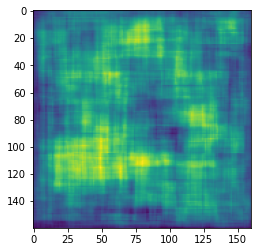

In [55]:
generator = build_generator(SEED_SIZE, IMAGE_CHANNELS)

noise = tf.random.normal([1, SEED_SIZE])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

In [56]:
image_shape = (GENERATE_SQUARE,GENERATE_SQUARE,IMAGE_CHANNELS)

discriminator = build_discriminator(image_shape)
decision = discriminator(generated_image)
print (decision)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 80, 80, 32)        896       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 80, 80, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 40, 40, 64)        18496     
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 41, 41, 64)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 41, 41, 64)        256       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 41, 41, 64)       

In [57]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [58]:
generator_optimizer = tf.keras.optimizers.Adam(1.5e-4,0.5)#default LR 1.4e-4
discriminator_optimizer = tf.keras.optimizers.Adam(1.5e-2,0.5)

In [59]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
  seed = tf.random.normal([BATCH_SIZE, SEED_SIZE])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(seed, training=True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)
    

    gradients_of_generator = gen_tape.gradient(\
        gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(\
        disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(
        gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(
        gradients_of_discriminator, 
        discriminator.trainable_variables))
  return gen_loss,disc_loss

In [60]:
#print history of lose
def plot_loss(history):
        hist = pd.DataFrame(history)
        plt.figure(figsize=(20,5))
        for colnm in hist.columns:
            plt.plot(hist[colnm],label=colnm)
        plt.legend()
        plt.ylabel("loss")
        plt.xlabel("epochs")
        plt.savefig('loss.jpg')
        plt.savefig('/content/drive/MyDrive/Colab Notebooks/GAN_Rwashin/Aug-rw6')
        plt.show()
       

In [61]:
def train(dataset, epochs):
  fixed_seed = np.random.normal(0, 1, (PREVIEW_ROWS * PREVIEW_COLS, 
                                       SEED_SIZE))
  start = time.time()
  history = []

  for epoch in range(epochs):
    epoch_start = time.time()

    gen_loss_list = []
    disc_loss_list = []

    for image_batch in dataset:
      t = train_step(image_batch)
      gen_loss_list.append(t[0])
      disc_loss_list.append(t[1])

    g_loss = sum(gen_loss_list) / len(gen_loss_list)
    d_loss = sum(disc_loss_list) / len(disc_loss_list)

    history.append({"G":g_loss, "D":d_loss})

    epoch_elapsed = time.time()-epoch_start
    print (f'Epoch {epoch+1}, gen loss={g_loss},disc loss={d_loss},'\
           ' {hms_string(epoch_elapsed)}')
    save_images(epoch,fixed_seed)

  elapsed = time.time()-start
  print (f'Training time: {hms_string(elapsed)}')
  plot_loss(history)
  


Epoch 1, gen loss=255.59422302246094,disc loss=82.01676177978516, {hms_string(epoch_elapsed)}
Epoch 2, gen loss=58.937835693359375,disc loss=17.49376678466797, {hms_string(epoch_elapsed)}
Epoch 3, gen loss=71.56610870361328,disc loss=18.289514541625977, {hms_string(epoch_elapsed)}
Epoch 4, gen loss=48.85382843017578,disc loss=7.6846771240234375, {hms_string(epoch_elapsed)}
Epoch 5, gen loss=53.39757537841797,disc loss=5.660812854766846, {hms_string(epoch_elapsed)}
Epoch 6, gen loss=37.0469970703125,disc loss=11.64268684387207, {hms_string(epoch_elapsed)}
Epoch 7, gen loss=22.024608612060547,disc loss=7.656642913818359, {hms_string(epoch_elapsed)}
Epoch 8, gen loss=13.519930839538574,disc loss=4.55168342590332, {hms_string(epoch_elapsed)}
Epoch 9, gen loss=9.91773796081543,disc loss=3.7434194087982178, {hms_string(epoch_elapsed)}
Epoch 10, gen loss=8.720802307128906,disc loss=2.032917022705078, {hms_string(epoch_elapsed)}
Epoch 11, gen loss=9.23347282409668,disc loss=2.1582319736480713,

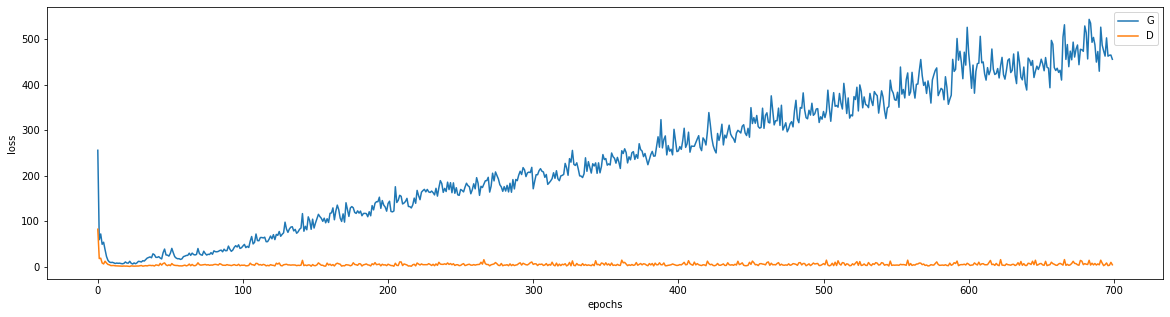

In [62]:
train(train_dataset, EPOCHS)

In [40]:
!rm "/content/Augmented_images/images (45).jpg"

rm: cannot remove '/content/Augmented_images/images (45).jpg': No such file or directory


اشيل الرواشين الصغيرة 
و ازيد رواشين عادية 
و اغير في الاوقمنتيشن 
